In [1]:
import base64
import requests
import io

from PIL import Image
from IPython.display import Image as DisplayImage

In [2]:
def decode_base64_and_show_image(base64_string):
    try:
        save_path = '/content/decoded.jpg'
        image_data = base64.b64decode(base64_string)
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        image.save(save_path)

        return save_path
    except Exception as e:
        print("An error occurred:", e)

Decoded image saved at: /content/decoded_output.png


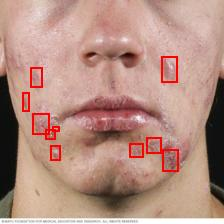

Bounding Boxes: [{'coordinates': [129.4560089111328, 143.43270874023438, 143.51025390625, 157.3451690673828], 'class_id': 6}, {'coordinates': [161.60107421875, 56.99836730957031, 177.75375366210938, 82.2406005859375], 'class_id': 10}, {'coordinates': [30.73975944519043, 67.731201171875, 42.9703483581543, 87.68882751464844], 'class_id': 6}, {'coordinates': [22.034982681274414, 92.42511749267578, 29.358322143554688, 111.33956146240234], 'class_id': 6}, {'coordinates': [50.301048278808594, 145.22137451171875, 60.90110778808594, 160.50579833984375], 'class_id': 10}, {'coordinates': [45.07024383544922, 129.6453628540039, 55.67123031616211, 139.02434635162354], 'class_id': 10}, {'coordinates': [32.09618377685547, 113.43283081054688, 49.39494323730469, 134.85964965820312], 'class_id': 10}, {'coordinates': [162.87152099609375, 149.666259765625, 178.22000122070312, 171.77127075195312], 'class_id': 10}, {'coordinates': [146.18948364257812, 137.1602020263672, 161.1877899169922, 153.72824096679688

In [5]:
import requests
import base64
import io
from PIL import Image
import os

# Function to decode base64 string and save/show the image
def decode_base64_and_save_image(base64_string, output_path):
    try:
        # Decode the base64 string
        image_data = base64.b64decode(base64_string)
        # Convert the image bytes into an image
        image_stream = io.BytesIO(image_data)
        image = Image.open(image_stream)
        # Save the decoded image
        image.save(output_path)
        print(f"Decoded image saved at: {output_path}")
        return output_path
    except Exception as e:
        print("Error decoding and saving image:", e)
        return None

# Configuration
NGROK_URL =   "https://85d0-34-106-92-100.ngrok-free.app"
API_ENDPOINT = "/upload_image"
FULL_URL = f"{NGROK_URL}{API_ENDPOINT}"

# Path to the test image
image_path = "/content/000003 (1).jpg"

# Ensure the file exists
if not os.path.exists(image_path):
    print(f"Error: File does not exist at {image_path}")
else:
    try:
        # Open the image file and send a POST request
        with open(image_path, "rb") as image_file:
            response = requests.post(FULL_URL, files={"image": image_file})

        # Check server response
        if response.status_code == 200:
            result = response.json()
            # Decode and save the output image
            output_image_base64 = result.get("output_image")
            if output_image_base64:
                decoded_image_path = "/content/decoded_output.png"
                decode_base64_and_save_image(output_image_base64, decoded_image_path)
                # Display the output image (optional)
                from IPython.display import Image as IPImage, display
                display(IPImage(decoded_image_path))
            else:
                print("Error: No output image in the server response.")
            # Print bounding boxes and other details
            print(f"Bounding Boxes: {result.get('bounding_boxes')}")
            print(f"Total Acnes: {result.get('total_acnes')}")
            print(f"Time Taken: {result.get('time_taken')} seconds")
        else:
            print(f"Error: Server responded with status code {response.status_code} - {response.text}")
    except requests.exceptions.RequestException as e:
        print(f"Error connecting to the server: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
